In [11]:
# import pandas as pdc
import numpy as np
import os
import tensorflow as tf
import cv2
import keras
from keras.layers import Dense,Input, InputLayer, Flatten
from keras.models import Sequential, Model, load_model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix,f1_score


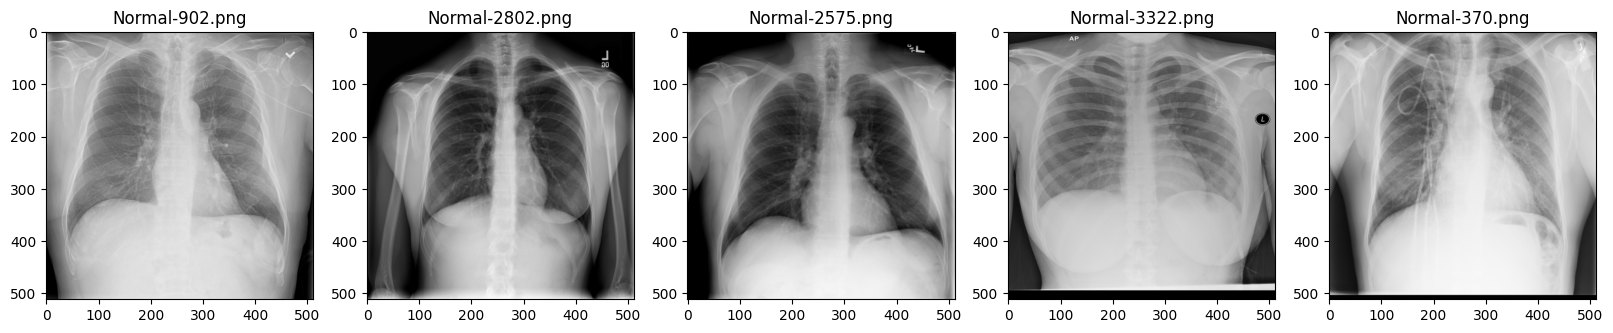

In [12]:
#View some samples of the Normal dataset
import random
plt.figure(figsize=(20,20))
folder= r'TB_Chest_Radiography_Database/Normal'
for i in range(5):
    file = random.choice(os.listdir(folder))
    image_path= os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)


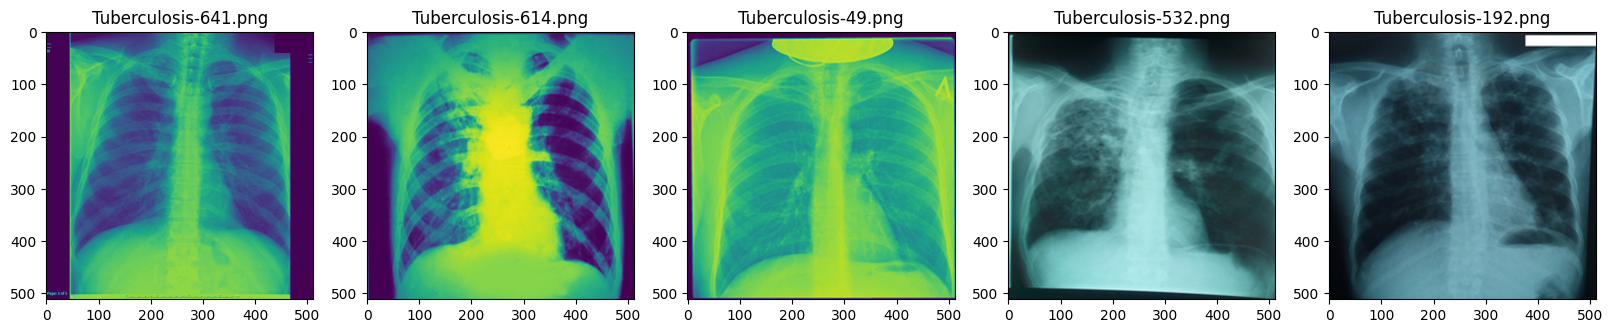

In [13]:
#View some samples of the Tuberculosis dataset
import random
plt.figure(figsize=(20,20))
folder= r'TB_Chest_Radiography_Database/Tuberculosis'
for i in range(5):
    file = random.choice(os.listdir(folder))
    image_path= os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [14]:
def load_and_preprocess_data(data_dir, image_size):
    images = []
    labels = []

    # Iterate through each folder (each class of flowers)
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)

        # Iterate through each image in the class folder
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)

            # Read image and resize
            image = cv2.imread(image_path) #reads in BGR format
            
            #To read an image in grayscale 
            image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)

            #To read an image in RGB
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            image = cv2.resize(image, image_size)

            # Normalize pixel values to [0, 1]
            image = image.astype('float32') / 255.0

            # Append to the lists
            images.append(image)
            labels.append(class_name)

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels



In [15]:
dataset_dir = "TB_Chest_Radiography_Database"

In [16]:
image_size = (128, 128)

images, labels = load_and_preprocess_data(dataset_dir, image_size)

In [17]:
print(len(images))
print(len(labels))

4200
4200


In [18]:
images

array([[[0.01568628, 0.01176471, 0.01176471, ..., 0.03921569,
         0.03921569, 0.04313726],
        [0.01176471, 0.01176471, 0.01176471, ..., 0.01568628,
         0.01568628, 0.01568628],
        [0.01176471, 0.01176471, 0.01176471, ..., 0.01568628,
         0.01568628, 0.01568628],
        ...,
        [0.01568628, 0.01568628, 0.01568628, ..., 0.02745098,
         0.02745098, 0.03137255],
        [0.01568628, 0.01568628, 0.01176471, ..., 0.02745098,
         0.02745098, 0.03137255],
        [0.01568628, 0.01568628, 0.01176471, ..., 0.02745098,
         0.03137255, 0.03529412]],

       [[0.9019608 , 0.85882354, 0.80784315, ..., 0.87058824,
         0.8862745 , 0.92941177],
        [0.79607844, 0.6039216 , 0.4509804 , ..., 0.76862746,
         0.79607844, 0.84313726],
        [0.41960785, 0.07843138, 0.00392157, ..., 0.6431373 ,
         0.68235296, 0.7372549 ],
        ...,
        [0.06666667, 0.06666667, 0.06666667, ..., 0.04705882,
         0.06666667, 0.32941177],
        [0.0

In [19]:
labels

array(['Normal', 'Normal', 'Normal', ..., 'Tuberculosis', 'Tuberculosis',
       'Tuberculosis'], dtype='<U12')

In [20]:
from sklearn.preprocessing import LabelEncoder
# Convert class labels to one-hot encoded vectors i.e 0, 1
label_encoder = LabelEncoder()
encoded_class_names = label_encoder.fit_transform(labels)

In [21]:
encoded_class_names

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [22]:
from sklearn.model_selection import train_test_split


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, encoded_class_names, test_size=0.33, random_state=42)

y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)

# Check the shapes of the datasets
print("Train images shape:", X_train.shape)
print("Validation labels shape:", y_train.shape)

print("Test images shape:", X_test.shape)
print("Validation labels shape:", y_test.shape)


Train images shape: (2814, 128, 128)
Validation labels shape: (2814,)
Test images shape: (1386, 128, 128)
Validation labels shape: (1386,)


In [23]:
X_train

array([[[0.        , 0.        , 0.04705882, ..., 0.04313726,
         0.04313726, 0.04705882],
        [0.        , 0.        , 0.04705882, ..., 0.04313726,
         0.04313726, 0.04313726],
        [0.        , 0.        , 0.04705882, ..., 0.04313726,
         0.04313726, 0.04313726],
        ...,
        [0.        , 0.        , 0.10980392, ..., 0.6509804 ,
         0.5882353 , 0.4745098 ],
        [0.        , 0.        , 0.18431373, ..., 0.69803923,
         0.6313726 , 0.54901963],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.00392157, 0.        ]],

       [[0.18431373, 0.15294118, 0.15294118, ..., 0.19607843,
         0.26666668, 0.22352941],
        [0.14117648, 0.14509805, 0.14117648, ..., 0.16470589,
         0.27450982, 0.21568628],
        [0.14901961, 0.15294118, 0.15294118, ..., 0.15686275,
         0.1764706 , 0.2       ],
        ...,
        [0.5882353 , 0.5176471 , 0.40784314, ..., 0.13725491,
         0.14901961, 0.14509805],
        [0.5

In [24]:
y_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

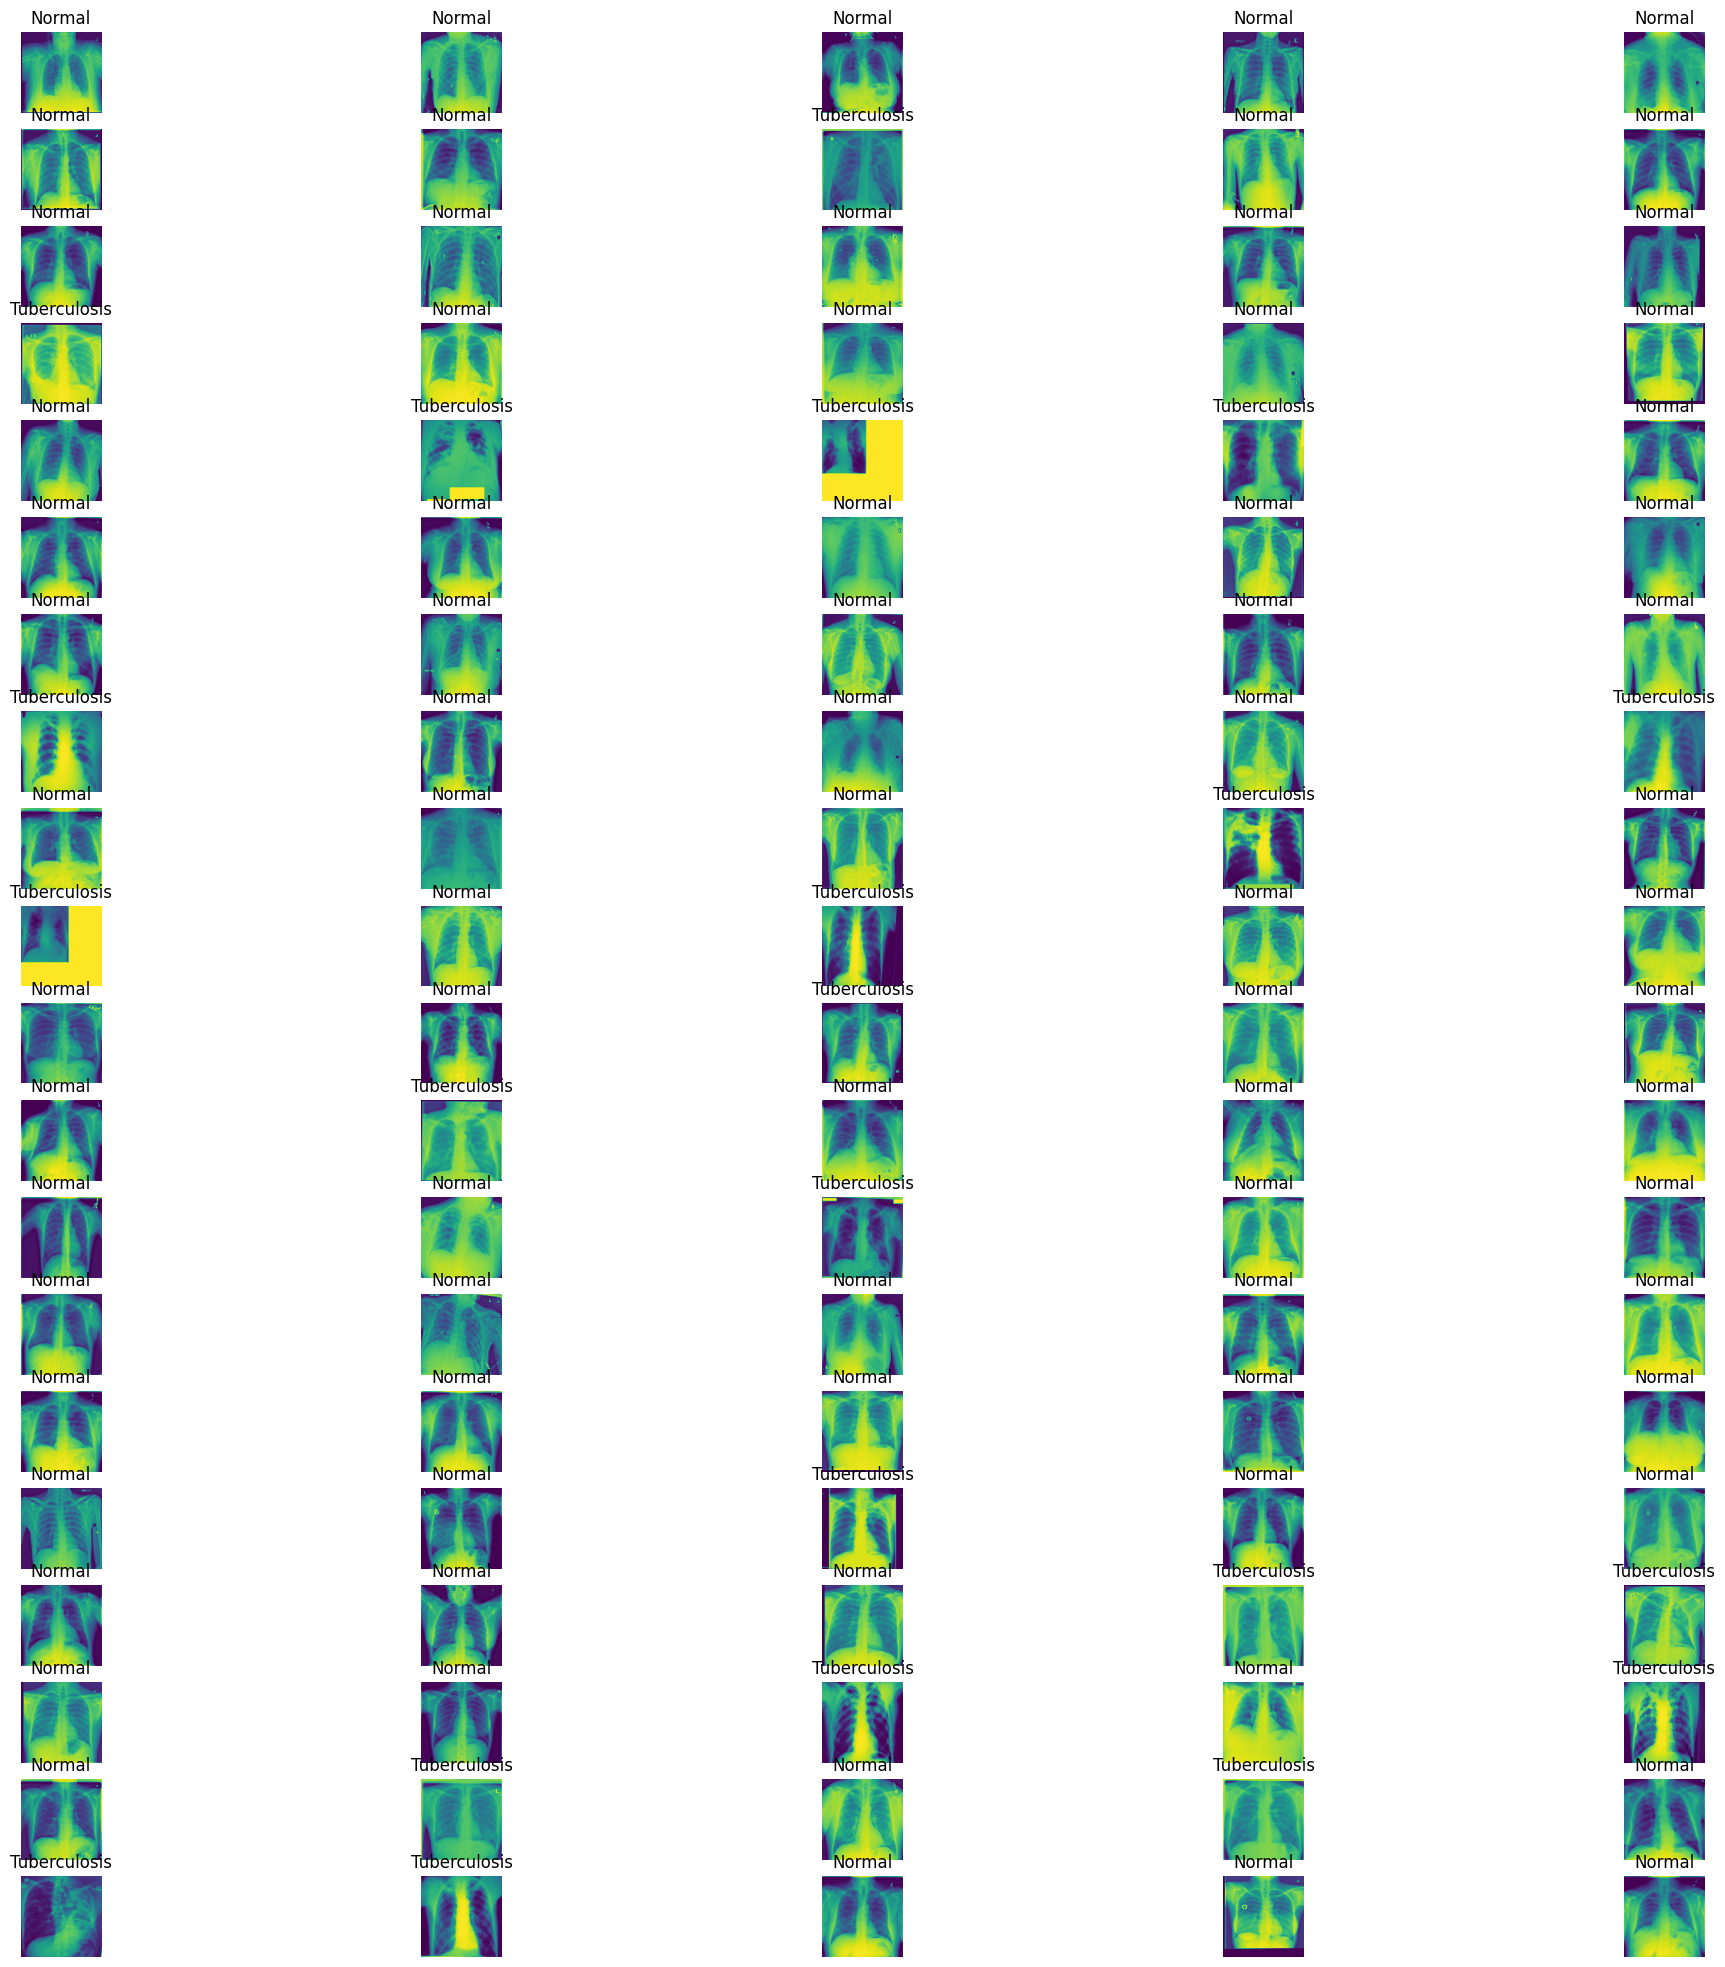

In [25]:
def plot_images(images, labels, num_images=100):
    plt.figure(figsize=(25, 25))
    for i in range(num_images):
        plt.subplot(20, 5, i + 1)  # Create subplot
        plt.imshow(images[i])  # Display image
        if labels[i] == 0:    
            plt.title("Normal")
        if labels[i] == 1:    
            plt.title("Tuberculosis")
        plt.axis('off')  # Turn off axis
    plt.show()

# Plot images with labels
plot_images(X_train, y_train)

In [26]:
model = keras.Sequential([
    keras.layers.Conv2D(128, (3, 3), input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    keras.layers.LeakyReLU(alpha=0.02),
    
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3)),
    keras.layers.LeakyReLU(alpha=0.02),
    
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.GlobalMaxPooling2D(),
    
    keras.layers.Dense(512),
    keras.layers.LeakyReLU(alpha=0.02),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(10),
    keras.layers.Activation('softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

C:\Users\Ans\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Ans\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 128)       │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 126, 126, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 61, 61, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,042 (859.54 KB)

 Trainable params: 220,042 (859.54 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Compile the model
initial_lr = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_lr, decay_steps=10000, decay_rate=0.9
)
optimizer = Adam(learning_rate=lr_schedule)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 528ms/step - accuracy: 0.7856 - loss: 0.7546 - val_accuracy: 0.8437 - val_loss: 0.3919
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 37s 522ms/step - accuracy: 0.8403 - loss: 0.3245 - val_accuracy: 0.8632 - val_loss: 0.3111
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 36s 509ms/step - accuracy: 0.8608 - loss: 0.2609 - val_accuracy: 0.8970 - val_loss: 0.2586
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 36s 514ms/step - accuracy: 0.9058 - loss: 0.2182 - val_accuracy: 0.9396 - val_loss: 0.2058
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 39s 545ms/step - accuracy: 0.9203 - loss: 0.1835 - val_accuracy: 0.9307 - val_loss: 0.1966
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 42s 596ms/step - accuracy: 0.9521 - loss: 0.1271 - val_accuracy: 0.9503 - val_loss: 0.1717
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 38s 536ms/step - accuracy: 0.9369 - loss: 0.1453 - val_accuracy: 0.9485 - val_loss: 0.1552
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 42s 593ms/step - accuracy: 0.9608 - loss: 0.1075 - val_accu

In [58]:
predicted_labels = model.predict(X_test)
predicted_labels = np.argmax(predicted_labels, axis=1)
#predicted_class_names = label_encoder.inverse_transform(predicted_labels)

f1 = f1_score(y_test, predicted_labels, average='macro')
report = classification_report(y_test, predicted_labels)

print("F1 Score:", f1)
print("Classification Report:")
print(report)

44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step
F1 Score: 0.964131097842764
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1151
           1       0.94      0.94      0.94       235

    accuracy                           0.98      1386
   macro avg       0.96      0.96      0.96      1386
weighted avg       0.98      0.98      0.98      1386



In [59]:
history.history['accuracy']

[0.8223012089729309,
 0.8396268486976624,
 0.8596179485321045,
 0.9138160943984985,
 0.9293647408485413,
 0.9431363940238953,
 0.944469153881073,
 0.9520213007926941,
 0.9404708743095398,
 0.9644602537155151,
 0.9675699472427368,
 0.972900927066803,
 0.972456693649292,
 0.9755663871765137,
 0.9844513535499573,
 0.9848955869674683,
 0.9808973670005798,
 0.9808973670005798,
 0.985784113407135,
 0.987116813659668,
 0.9822301268577576,
 0.9831185936927795,
 0.9848955869674683,
 0.9835628867149353,
 0.9911150336265564,
 0.9924477934837341,
 0.9911150336265564,
 0.9893380999565125,
 0.9844513535499573,
 0.9902265667915344,
 0.9920035600662231,
 0.9946690201759338,
 0.987116813659668,
 0.9977787733078003,
 0.9986672401428223,
 0.9920035600662231,
 0.9875611066818237,
 0.9844513535499573,
 0.9915593266487122,
 0.9911150336265564,
 0.9955575466156006,
 0.9982230067253113,
 0.9968902468681335,
 0.9888938069343567,
 0.9928920269012451,
 0.9915593266487122,
 0.987116813659668,
 0.9955575466156006,

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

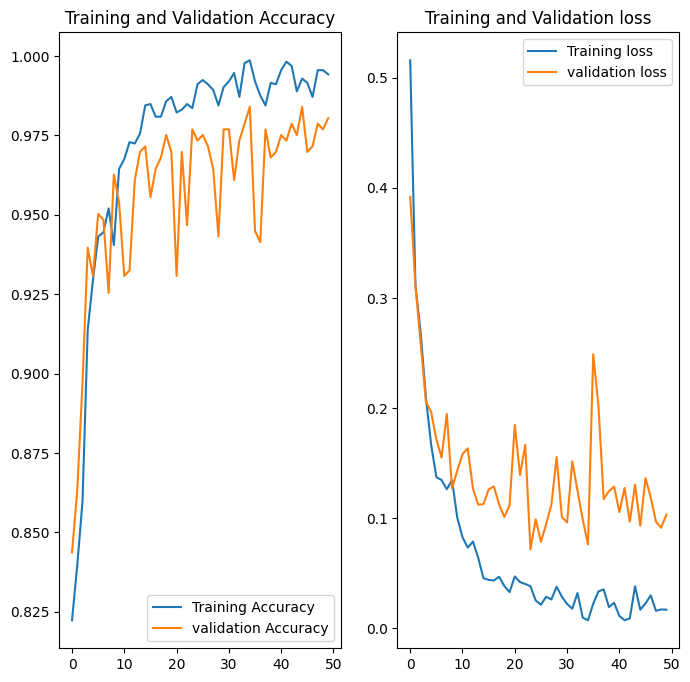

In [61]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(50),acc, label='Training Accuracy')
plt.plot(range(50),val_acc, label='validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(50),loss, label='Training loss')
plt.plot(range(50),val_loss, label='validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()

In [62]:
os.listdir("./models")

['1.h5']

In [63]:
model_version = 1
model.save(f"./models/{model_version}.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


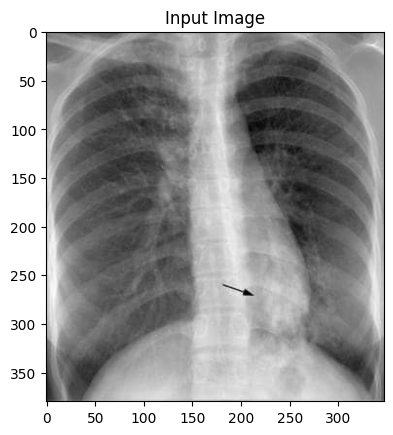

Tuberculosis is present.


In [84]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the model
model_version = 1
model_path = f"./models/{model_version}.h5"
model = tf.keras.models.load_model(model_path)

def predict_tuberculosis(image_path):
    # Load and process the image
    first_image = Image.open(image_path)

    # Convert RGB image to grayscale
    gray_image = first_image.convert('L')

    # Resize the grayscale image to match model input size
    input_size = (380, 347)
    resized_image = gray_image.resize(input_size)

    # Convert PIL image to NumPy array
    img_array = np.array(resized_image)

    # Expand the dimensions to create a batch of size 1
    img_batch = np.expand_dims(img_array, axis=0)

    # Normalize pixel values
    img_batch = img_batch / 255.0

    # Make predictions
    predictions = model.predict(img_batch)

    # Display the image
    plt.imshow(first_image, cmap='gray')
    plt.title('Input Image')
    plt.show()

    # Check the prediction against a threshold
    threshold = 0.5
    if predictions[0][0] > threshold:
        print("Tuberculosis is present.")
    else:
        print("No tuberculosis detected.")

# Example usage

notebook_directory = os.getcwd()
files = os.listdir(notebook_directory)

# Filter out only image files
image_files = [file for file in files if file.endswith(('.jpg', '.jpeg', '.png'))]

# Load the first image
first_image_path = os.path.join(notebook_directory, image_files[0])
image_path = 'Desktop/AI project/test.jpg'
predict_tuberculosis(first_image_path)